The purpose of this notebook is to present the benefits of hierarchical clustering for data analysis and for improving the representation of correlation heatmaps. For this notebook, we use the *breast-cancer-wisconsin* dataset.

# Correlation coefficient

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
data =  X

# Show dataframe
data

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


To measure the interplay between the different features, we will calculate the correlation coefficient between pairs. The correlation between two features gives us a degree of their relation. This relation can be linear or nonlinear. For this notebook, we will use linear correlation calculating the [Pearson Correlation Coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) ($\rho$).

Correlation ranges from -1 to 1, where -1 indicates anticorrelation (or negative correlation), 0 no correlation and 1 correlation (or positive correlation). The following plot shows a pair of signals with their respective correlation.

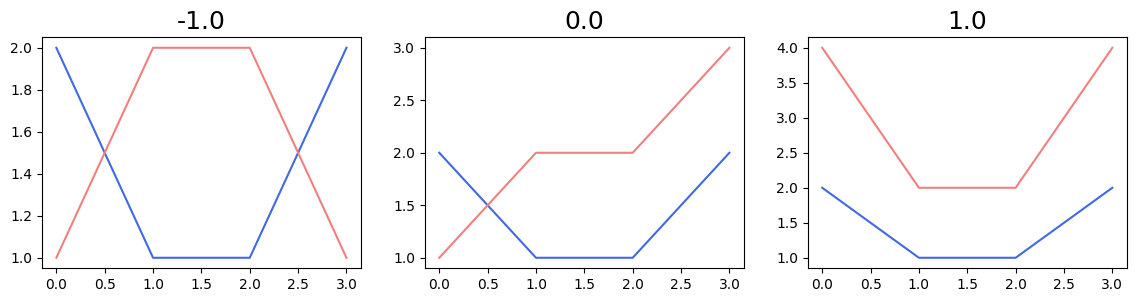

In [ ]:
import numpy as np

plt.figure(figsize=(14,3))

line1 = np.array([2, 1, 1, 2])
line2 = np.array([1, 2, 2, 1])

plt.subplot(131)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(np.corrcoef(line1, line2)[1,0], fontsize=18)

line1 = np.array([2, 1, 1, 2])
line2 = np.array([1, 2, 2, 3])

plt.subplot(132)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(round(np.corrcoef(line1, line2)[1,0],2), fontsize=18)

line1 = np.array([2, 1, 1, 2])
line2 = 2*line1

plt.subplot(133)
plt.plot(line1, color='royalblue')
plt.plot(line2, color='lightcoral')
plt.title(np.corrcoef(line2, 2*line2)[1,0], fontsize=18);


The three plots show a negative correlation, no correlation, and positive correlation, respectively.

Linear correlation is helpful in gaining quick intuition about the relation between two signals. However, it has some drawbacks. For instance, it won't account for sequential displacements (we would need to use lags) or non-linearities. Also, keep in mind that [correlation doesn't necessary mean causation](https://www.tylervigen.com/spurious-correlations).

In the next figure, we plot a heatmap with all the correlations between features:

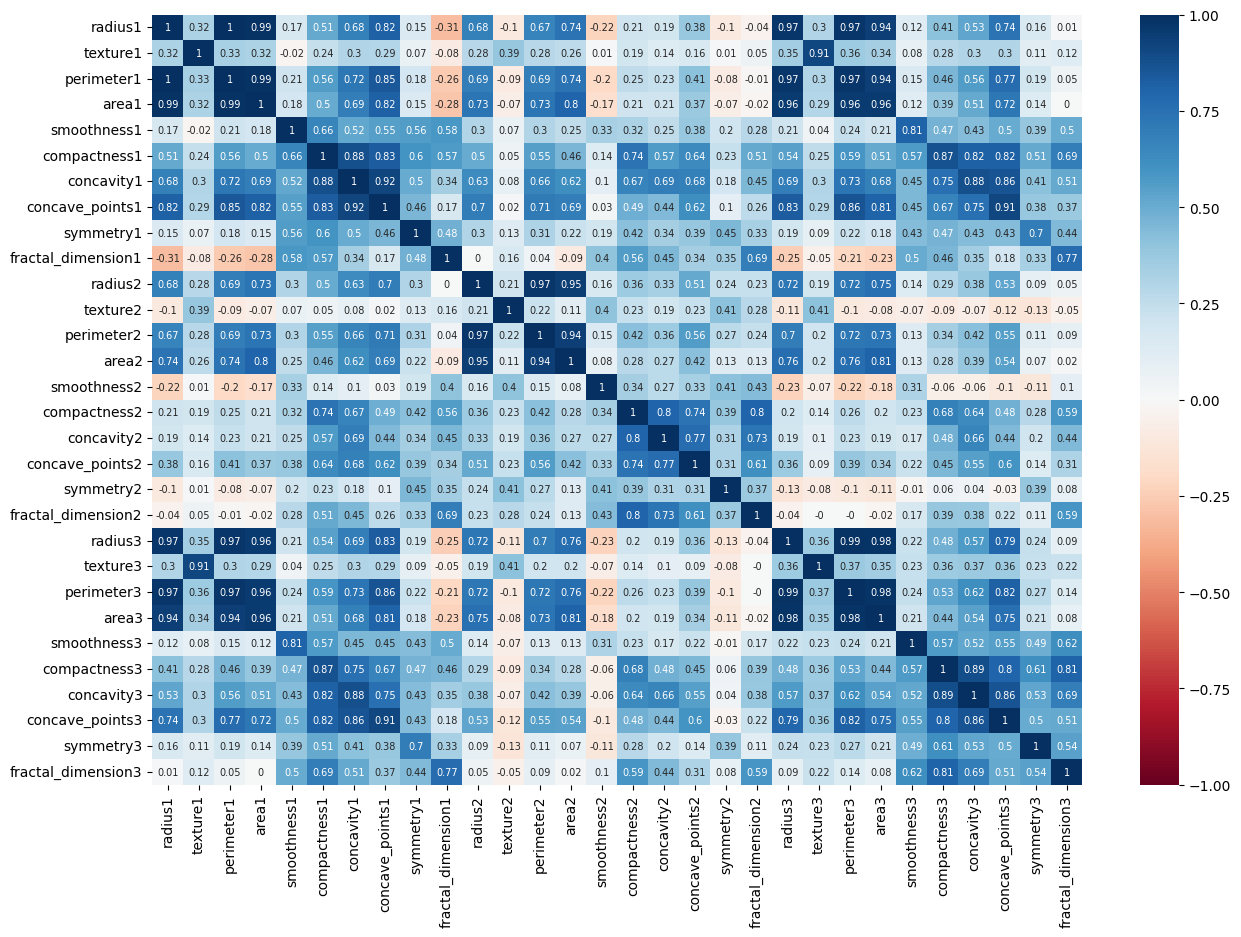

In [ ]:
plt.figure(figsize=(15,10))
correlations = data.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True,
            annot_kws={"size": 7}, vmin=-1, vmax=1);

At first sight, we see many positive correlations (blue). However, this heatmap is messy. For visualization purposes, it would be better to group features that are highly correlated together. To do so, we will do [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

# Hierarchical Clustering

Hierarchical clustering is a method to find hierarchy within our data. This hierarchy allows ordering the data in clusters. It arranges the data using a dissimilarity matrix (also called distance matrix), which gives information on how far are two features. The distance can be computed in many different ways. Since we're using the Pearson Correlation Coefficient, the distance matrix will be calculated as follows:

$$
d(X, Y) = 1 - \big | \ \rho_{X, Y} \ \big |
$$

For negative and positive correlations, the distance will be close to zero. If there is no correlation whatsoever, the distance will be $\approx 0$.

After computing the distance matrix, we have to group features hierarchically according to their distances. Then we can visualize the relationship between features in a tree diagram called dendrogram..

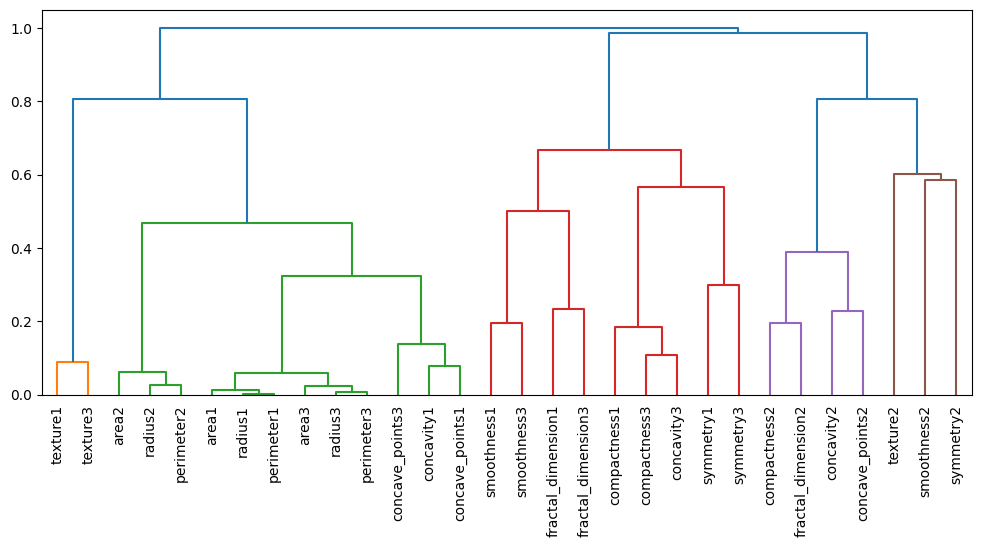

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=data.columns, orientation='top',
           leaf_rotation=90);

Initially, before starting the algorithm, each feature is a cluster. The algorithms take close features and combine them into a brand new cluster. Iteratively, the algorithm keeps grouping clusters until there is only one. Each leaf in the dendrogram represents a feature and each node a cluster. The *y-axis* shows the distance between points (ranging from 0 to 1). The number of clusters in our data will depend on which distance we take as a threshold. If we select a small distance, more clusters will be formed. Conversely, if we choose a large distance as a threshold, we would less clusters.



In [ ]:
# Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

array([2, 1, 2, 2, 3, 3, 2, 2, 3, 3, 2, 5, 2, 2, 5, 4, 4, 4, 5, 4, 2, 1,
       2, 2, 3, 3, 3, 2, 3, 3], dtype=int32)

`label` shows which cluster each of the features belongs to. Finally, to observe the clusters in the correlation plot, we have to rearrange the features in the dataframe according to the cluster output.

In [ ]:
import numpy as np

# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(data.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(data[i])
    else:
        df_to_append = pd.DataFrame(data[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)

Finally, we plot the clustered correlation plot:

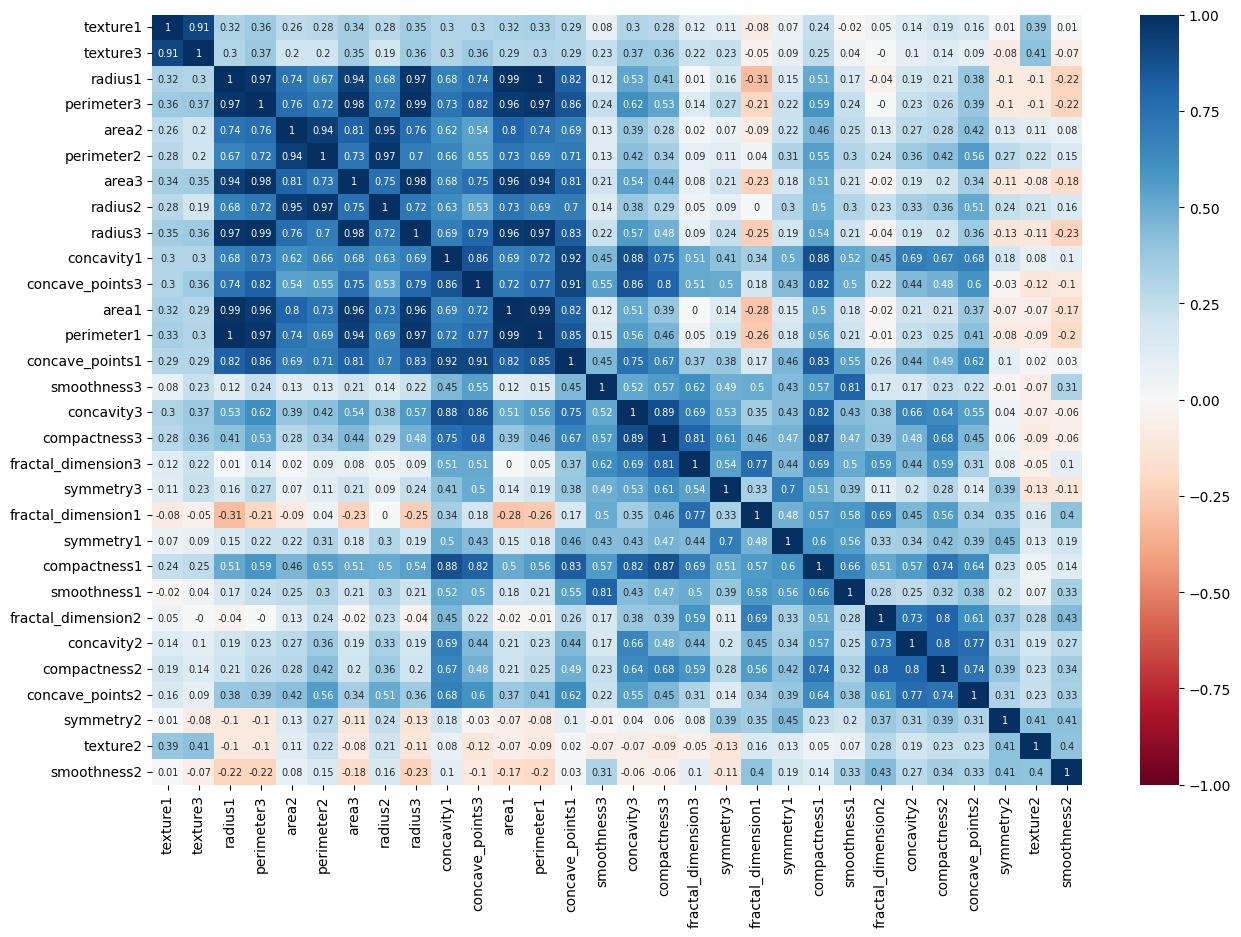

In [ ]:
plt.figure(figsize=(15,10))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='RdBu', annot=True,
            annot_kws={"size": 7}, vmin=-1, vmax=1);

Since our threshold was set at 0.7, we will be able to see five different clusters (grouped in the main diagonal). The biggest one corresponds to the red tree in the dendrogram. Since these features are related to the geometry of cancer, they form a robust cluster. Another distinct cluster is formed just by `texture_mean` and `texture_worst`, in green in the dendrogram. Note that in order for this cluster to disappear, we'd have to decrease the threshold considerably. The remaining clusters are less recognizable, given that their distances are higher.

The following plot shows the different clusters using a different threshold.

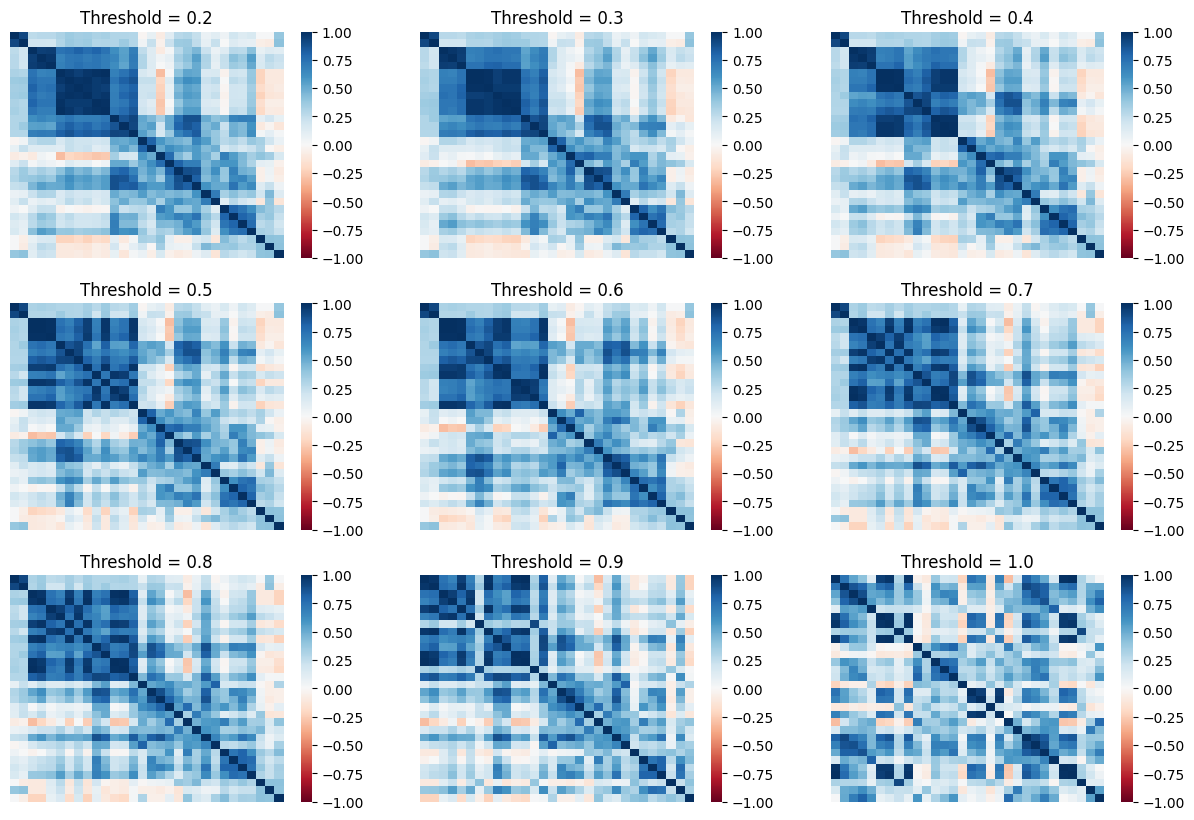

In [ ]:
plt.figure(figsize=(15,10))

for idx, t in enumerate(np.arange(0.2,1.1,0.1)):

    # Subplot idx + 1
    plt.subplot(3, 3, idx+1)

    # Calculate the cluster
    labels = fcluster(Z, t, criterion='distance')

    # Keep the indices to sort labels
    labels_order = np.argsort(labels)

    # Build a new dataframe with the sorted columns
    for idx, i in enumerate(data.columns[labels_order]):
        if idx == 0:
            clustered = pd.DataFrame(data[i])
        else:
            df_to_append = pd.DataFrame(data[i])
            clustered = pd.concat([clustered, df_to_append], axis=1)

    # Plot the correlation heatmap
    correlations = clustered.corr()
    sns.heatmap(round(correlations,2), cmap='RdBu', vmin=-1, vmax=1,
                xticklabels=False, yticklabels=False)
    plt.title("Threshold = {}".format(round(t,2)))

Seaborn also includes a function *clustermap* to plot the correlation heatmats with dendrograms.

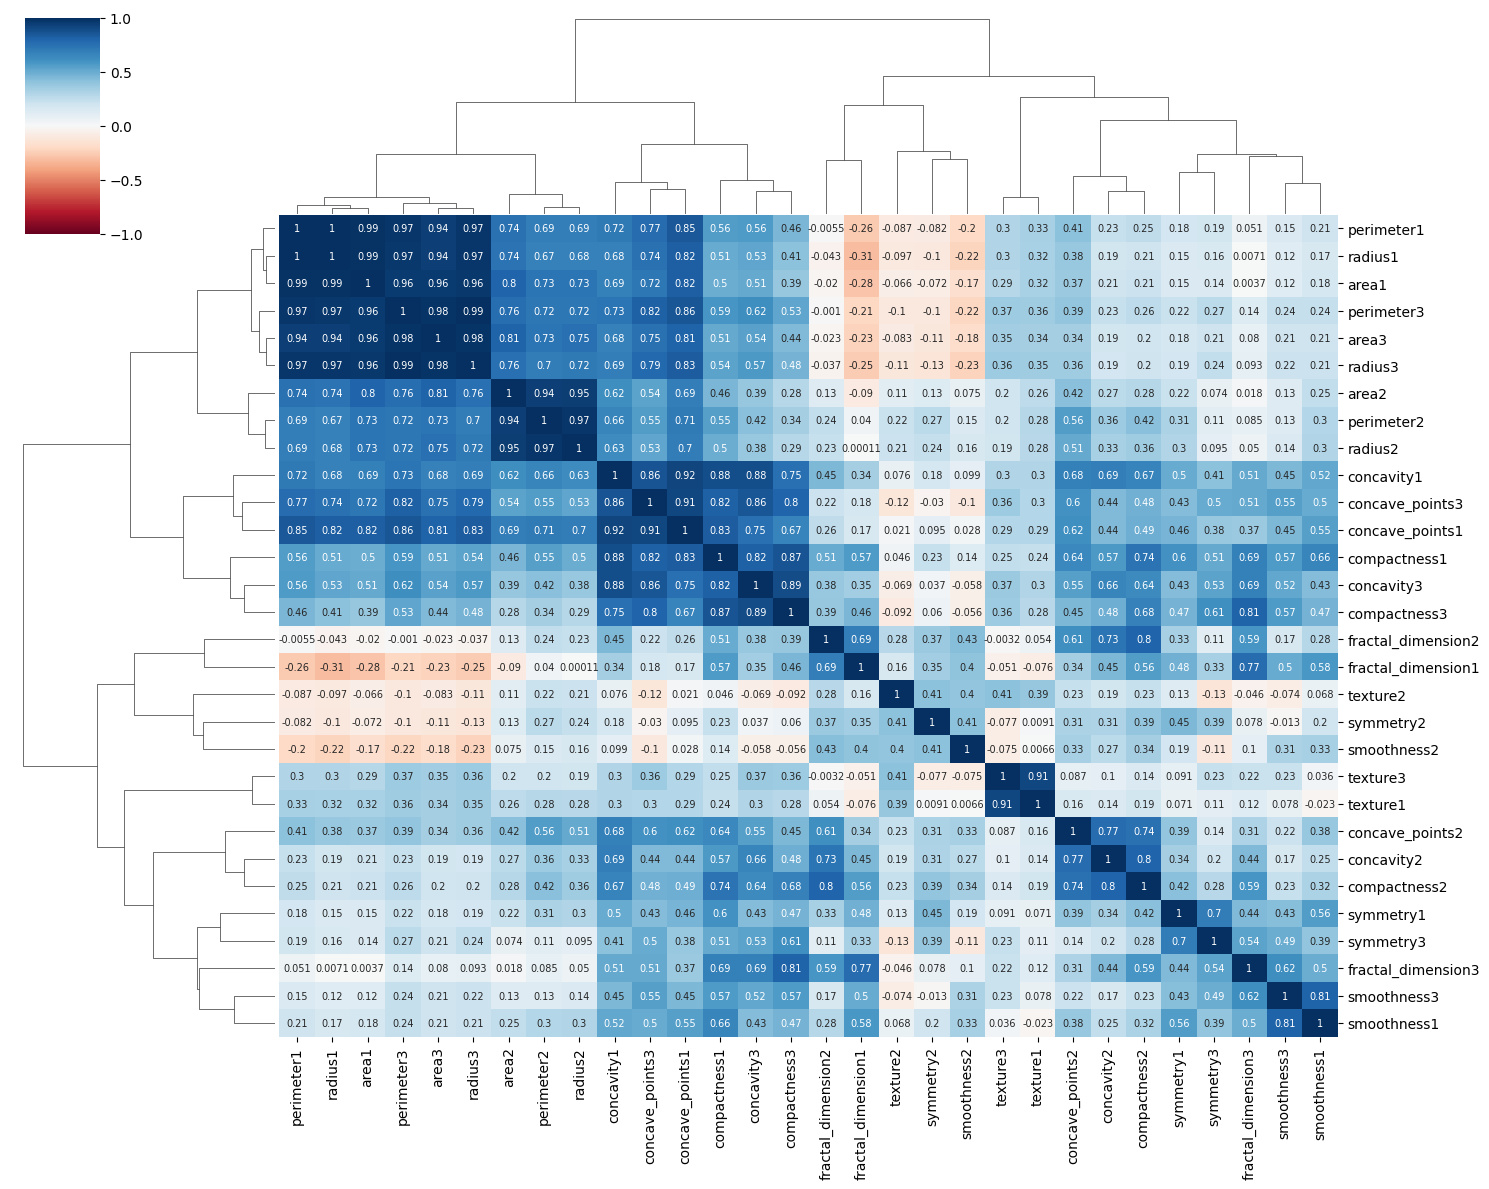

In [ ]:
sns.clustermap(correlations, method="complete", cmap='RdBu', annot=True,
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));


# Conclusions

Hierarchical clustering can be helpful in understanding our data better. It also improves the visual representation of correlation heatmaps, making it easier to find groups of correlated features.

# References
1. [Hierarchical Clustering with Python and Scikit Learn](https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/)
2. [Scipy Hierarchical Clustering](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html)